# Project 4: Introduction to Convolutional Neural Networks (CNN)

**Objective:** Upgrade from standard Dense Networks (MLP) to **Convolutional Neural Networks (CNNs)** for image classification.

**Why CNN?**
Unlike MLPs that flatten the image (destroying spatial structure), CNNs scan the image using filters to detect patterns like edges, curves, and shapes. This makes them significantly more powerful for visual tasks.

**Architecture:**
1.  **Input:** 28x28x1 (Preserving height, width, and depth).
2.  **Conv2D:** Extracts spatial features.
3.  **MaxPooling2D:** Reduces dimensionality (downsampling).
4.  **Flatten + Dense:** Performs the final classification.

In [34]:
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras.datasets import cifar10
from keras import datasets
from google.colab import files
from PIL import Image

# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
x_train = train_images.reshape((60000,28,28,1))
x_test = test_images.reshape((10000,28,28,1))
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6428 - loss: 1.3840 - val_accuracy: 0.9178 - val_loss: 0.2918
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9214 - loss: 0.2769 - val_accuracy: 0.9426 - val_loss: 0.1943
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9463 - loss: 0.1901 - val_accuracy: 0.9569 - val_loss: 0.1511
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9603 - loss: 0.1435 - val_accuracy: 0.9654 - val_loss: 0.1198
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9659 - loss: 0.1204 - val_accuracy: 0.9705 - val_loss: 0.1057
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9728 - loss: 0.0968 - val_accuracy: 0.9735 - val_loss: 0.0918
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9767 - loss: 0.0873 - val_accuracy: 0.9759 - val_loss: 0.0839
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9796 - loss: 0.0769 - val_accuracy: 0

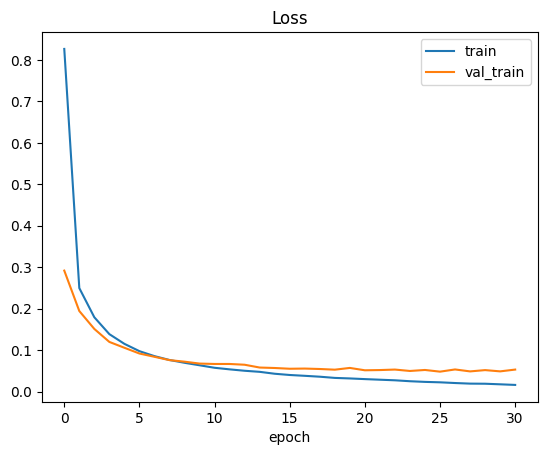

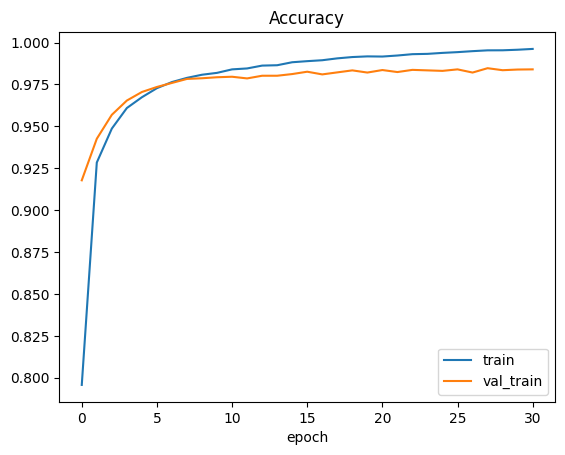

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loss: 0.04806692898273468, test accuracy: 0.984


In [37]:
# CNN Architecture
model = keras.Sequential([
layers.Input(shape=(28,28,1)),
layers.Conv2D(16, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.0005),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(x_train, y_train, epochs=40, batch_size=512, callbacks=[early_stopping],
verbose=1, validation_data=(x_test, y_test))

# Loss Plot
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Accuracy Plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Predictions
predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

# Final Metrics
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")

### Improving the Architecture: Deeper CNN

We extend the model by adding a **second Convolutional block** (Conv2D + MaxPooling).

**Why deeper?**
* **Layer 1:** Detects simple edges and gradients.
* **Layer 2:** Combines these edges to detect shapes, corners, and textures.
* This hierarchical learning typically results in higher accuracy on complex datasets.

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6163 - loss: 1.5330 - val_accuracy: 0.9259 - val_loss: 0.2574
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9304 - loss: 0.2375 - val_accuracy: 0.9623 - val_loss: 0.1379
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9600 - loss: 0.1363 - val_accuracy: 0.9727 - val_loss: 0.0954
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9679 - loss: 0.1094 - val_accuracy: 0.9759 - val_loss: 0.0788
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9757 - loss: 0.0833 - val_accuracy: 0.9809 - val_loss: 0.0658
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9780 - loss: 0.0746 - val_accuracy: 0.9818 - val_loss: 0.0626
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9803 - loss: 0.0681 - val_accuracy: 0.9831 - val_loss: 0.0538
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9823 - loss: 0.0601 - val_accuracy: 0

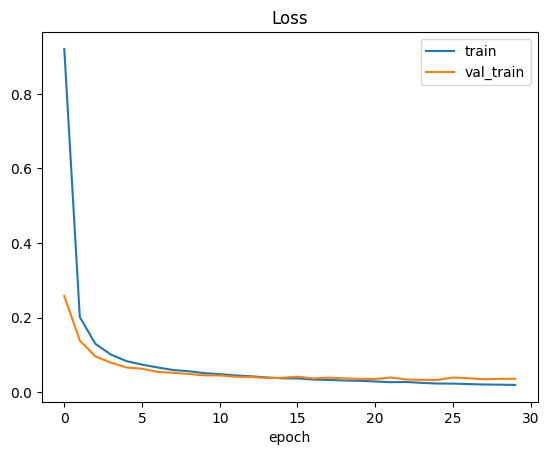

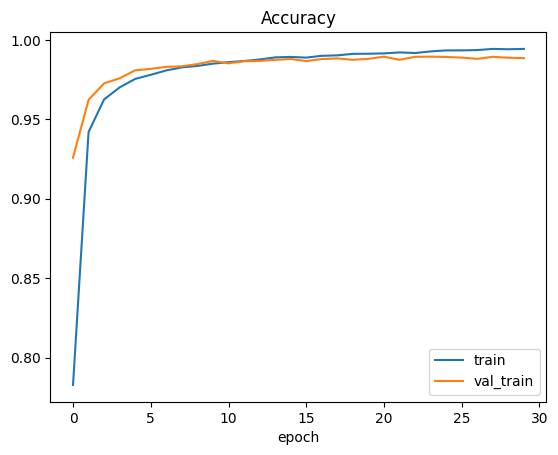

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loss: 0.03234274685382843, test accuracy: 0.989


In [38]:
model = keras.Sequential([
layers.Input(shape=(28,28,1)),
layers.Conv2D(16, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(32, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.0005),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(x_train, y_train, epochs=40, batch_size=512, callbacks=[early_stopping],
verbose=1, validation_data=(x_test, y_test))

# Loss Plot
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Accuracy Plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Predictions
predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

# Final Score
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")

### Going Deeper: 3-Layer CNN

We push the architecture further by adding a **third Convolutional block**.
* As we go deeper, the spatial dimensions reduce (28x28 -> 14x14 -> 7x7 -> 3x3), but the number of filters increases (16 -> 32 -> 64).
* This allows the network to learn highly abstract features from the small spatial maps.

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4849 - loss: 1.7998 - val_accuracy: 0.8951 - val_loss: 0.3576
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9028 - loss: 0.3321 - val_accuracy: 0.9302 - val_loss: 0.2284
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9346 - loss: 0.2139 - val_accuracy: 0.9470 - val_loss: 0.1641
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9490 - loss: 0.1680 - val_accuracy: 0.9593 - val_loss: 0.1320
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9576 - loss: 0.1422 - val_accuracy: 0.9614 - val_loss: 0.1199
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9606 - loss: 0.1291 - val_accuracy: 0.9665 - val_loss: 0.1076
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9659 - loss: 0.1162 - val_accuracy: 0.9704 - val_loss: 0.0951
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9698 - loss: 0.1000 - val_accuracy: 0

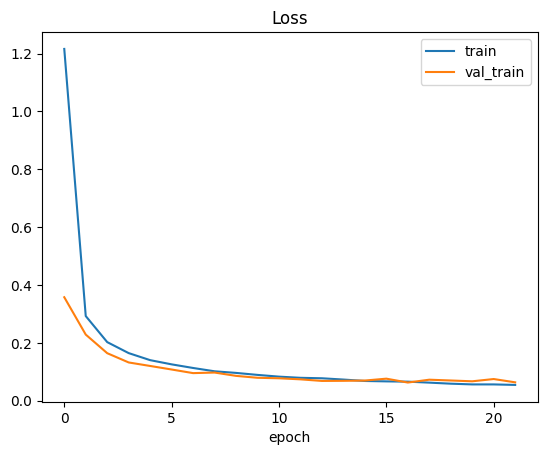

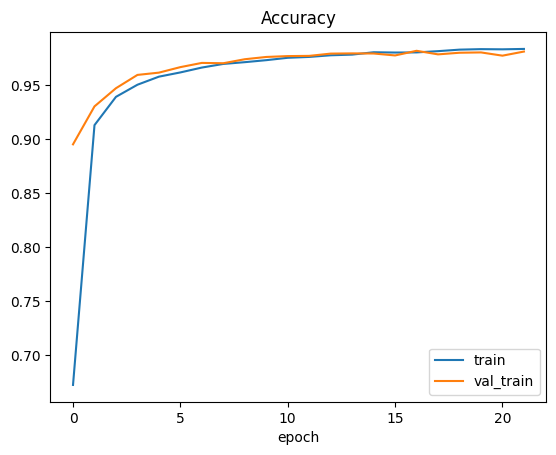

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loss: 0.06256680935621262, test accuracy: 0.982


In [39]:
model = keras.Sequential([
layers.Input(shape=(28,28,1)),
layers.Conv2D(16, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(32, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.0005),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(x_train, y_train, epochs=40, batch_size=512, callbacks=[early_stopping],
verbose=1, validation_data=(x_test, y_test))

# Loss Plot
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Accuracy Plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Predictions
predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

# Final Score
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")

# Project 4: Object Recognition (CIFAR-10)

**Objective:** Build a Convolutional Neural Network (CNN) to classify color images into 10 distinct categories.

**Dataset:** **CIFAR-10** consists of 60,000 color images (32x32 pixels, 3 channels - RGB).
**Classes:** Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.

**Challenge:** Unlike MNIST (grayscale, simple shapes), this dataset contains complex objects with varying backgrounds, lighting, and angles.

In [40]:
# Data Loading & Preprocessin
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Inspecting shapes
print(train_images.shape)
print(test_images.shape)

# Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Data Inspection

Before training, we visualize the first 25 images from the training set to verify the data integrity and understand the complexity of the classification task.

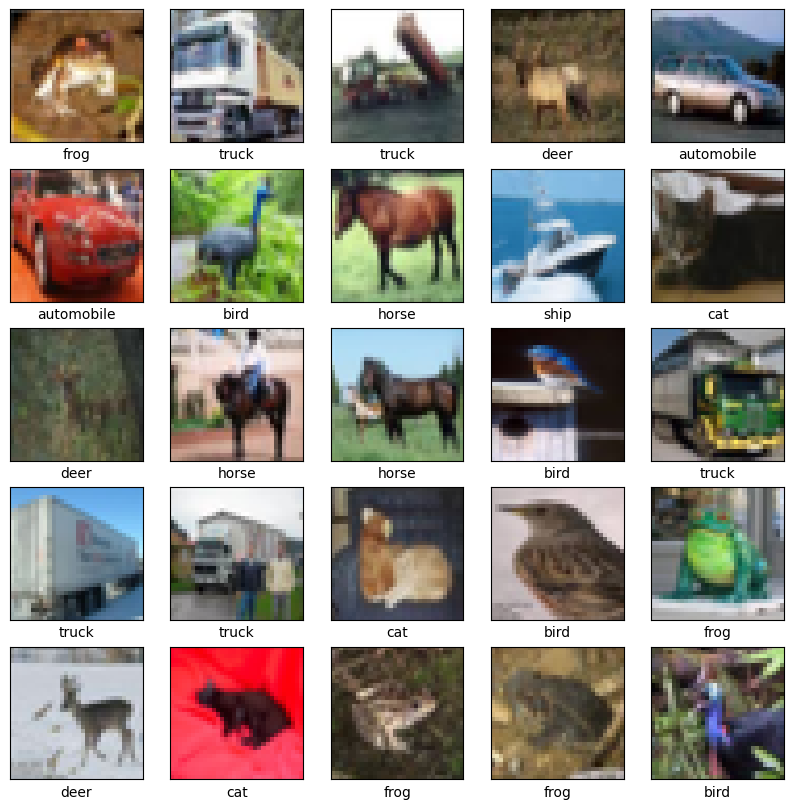

In [41]:
# Visualizing the first 25 images from the training set
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Robust CNN Architecture (with Dropout)

We design a deeper and more robust Convolutional Neural Network to handle the complexity of CIFAR-10 images.

**Key Features:**
* **3 Convolutional Blocks:** Extract features at different scales (32 -> 64 -> 128 filters).
* **Aggressive Regularization (Dropout):** We efficiently increase dropout rates (0.2 -> 0.3 -> 0.4 -> 0.5) deeper in the network. This forces the model to learn robust features and prevents it from memorizing the training data.
* **Optimizer:** We use **Adam** with a controlled learning rate (0.0005) for stable convergence.

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.1374 - loss: 2.2543 - val_accuracy: 0.2894 - val_loss: 2.0049
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2805 - loss: 1.9350 - val_accuracy: 0.4028 - val_loss: 1.7072
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3545 - loss: 1.7345 - val_accuracy: 0.4442 - val_loss: 1.5599
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4026 - loss: 1.6234 - val_accuracy: 0.4744 - val_loss: 1.4900
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4291 - loss: 1.5544 - val_accuracy: 0.4935 - val_loss: 1.4176
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4526 - loss: 1.5005 - val_accuracy: 0.5253 - val_loss: 1.3383
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4759 - loss: 1.4417 - val_accuracy: 0.5363 - val_loss: 1.3058
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4941 - loss: 1.4059 - val_accuracy: 0

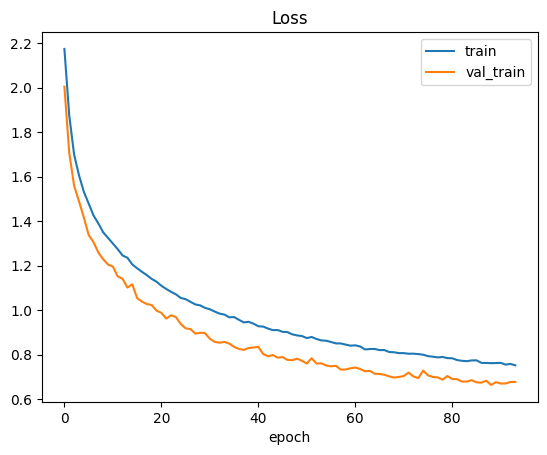

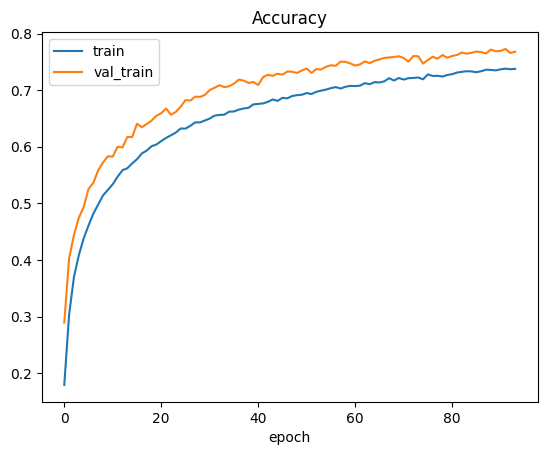

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Loss: 0.6635350584983826, test accuracy: 0.772


In [42]:
# Normalize pixel values
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

# Model Definition
model = keras.Sequential([
layers.Input(shape=(32,32,3)),
layers.Conv2D(32, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Dropout(0.2),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Dropout(0.3),
layers.Conv2D(128, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Dropout(0.4),
layers.Flatten(),
layers.Dense(128,activation='relu'),
layers.Dropout(0.5),
layers.Dense(10,activation='softmax')
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.0005),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(x_train, y_train, epochs=100, batch_size=512, callbacks=[early_stopping],
verbose=1, validation_data=(x_test, y_test))

# Plotting loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Predictions
predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

# Final Score
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")

### Error Analysis: Where does the model fail?

Visualizing misclassified examples is crucial for understanding the model's limitations. It helps us see if the model confuses visually similar classes (e.g., Cats vs. Dogs, or Automobiles vs. Trucks).

Below, we display **10 examples where the model made a mistake**, showing the predicted class versus the actual ground truth.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


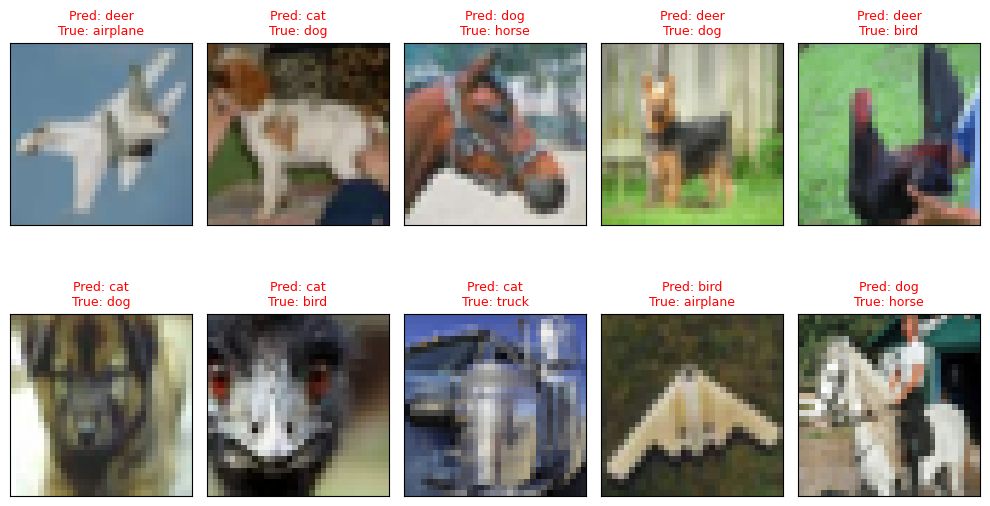

In [43]:
# Get predictions for the test set
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find indices where predictions do not match true labels
errors_mask = (y_pred != y_true)
error_indices = np.where(errors_mask)[0]

# Visualize the first 10 errors
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10, 6))
ax = ax.flatten()

for i in range(10):
    error_idx = error_indices[i]

    # Retrieve the image and labels
    img = x_test[error_idx]

    ax[i].imshow(img)

    # Display
    pred_name = class_names[y_pred[error_idx]]
    true_name = class_names[y_true[error_idx]]

    # Title with Prediction vs Truth (Red font indicates error)
    ax[i].set_title(f"Pred: {pred_name}\nTrue: {true_name}", color='red', fontsize=9)

    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()

### Real-World Testing

Finally, we test the model on external images. You can upload a photo (e.g., of a plane, a cat, or a car) to see how the model classifies it.

**Note on Resolution:** Since the model was trained on tiny **32x32 pixel images**, any uploaded photo will be downscaled significantly. This might affect accuracy if the object isn't clearly visible in the center.

Saving pies.jpg to pies (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


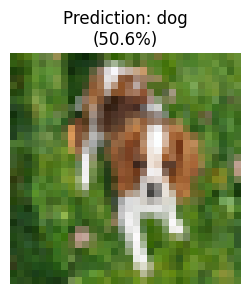

In [46]:
uploaded = files.upload()

for fn in uploaded.keys():

    # Load Image & Convert to RG
    img_original = Image.open(fn).convert('RGB')

    # Resize to 32x32 (Model Constraint)
    img_resized = img_original.resize((32, 32))

    # Convert to Array & Normalize
    img_array = np.array(img_resized)
    img_ready = img_array.astype('float32') / 255.0

    # Reshape (Add Batch Dimension: 1, 32, 32, 3)
    img_batch = img_ready.reshape(1, 32, 32, 3)

    # Predict
    prediction = model.predict(img_batch)
    result_idx = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    predicted_label = class_names[result_idx]

    # Visualization
    plt.figure(figsize=(3,3))
    plt.imshow(img_ready)
    plt.title(f"Prediction: {predicted_label}\n({confidence:.1f}%)")
    plt.axis('off')
    plt.show()

# Scaling Up to 100 Classes (CIFAR-100)

**New Challenge:**
We now upgrade the task from 10 classes to **100 fine-grained categories**.
The random guess accuracy drops from 10% to **1%**. The model must distinguish between very similar objects (e.g., *Maple Tree* vs. *Oak Tree*, or *Seal* vs. *Otter*).

**Advanced Architecture (VGG-Style):**
To handle this complexity, we use a deeper network with:
* **Batch Normalization:** To stabilize learning at deeper layers.
* **Double Convolutions:** Two Conv layers before every Pooling layer.
* **Heavy Regularization:** Increasing Dropout to prevent overfitting.

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


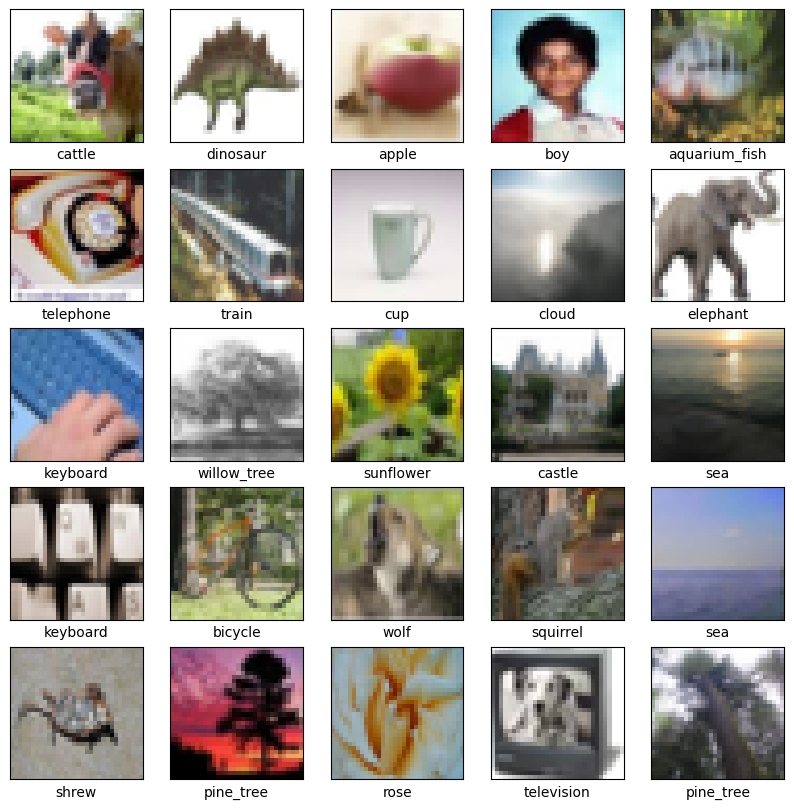

In [47]:
# Note: We overwrite the variables to save RAM, as we are done with CIFAR-10
(train_images, train_labels), (test_images, test_labels) =datasets.cifar100.load_data()

# 100 class names
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge',
'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab',
'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']

# Visualization of CIFAR-100
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Preprocessing
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-Hot Encoding (100 classes)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [48]:
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels


model = keras.Sequential([
layers.Input(shape=(32,32,3)),

# Block 1
layers.Conv2D(64, (3,3), padding='same', activation='relu'),
layers.BatchNormalization(),
layers.Conv2D(64, (3,3), padding='same',activation='relu'),
layers.BatchNormalization(),
layers.MaxPooling2D((2,2)),
layers.Dropout(0.2),

# Block 2
layers.Conv2D(128, (3,3), padding='same',activation='relu'),
layers.BatchNormalization(),
layers.Conv2D(128, (3,3), padding='same',activation='relu'),
layers.BatchNormalization(),
layers.MaxPooling2D((2,2)),
layers.Dropout(0.3),

# Block 3
layers.Conv2D(256, (3,3), padding='same',activation='relu'),
layers.BatchNormalization(),
layers.Conv2D(256, (3,3), padding='same',activation='relu'),
layers.BatchNormalization(),
layers.MaxPooling2D((2,2)),
layers.Dropout(0.4),

# Classification Head
layers.Flatten(),
layers.Dense(512,activation='relu'),
layers.Dropout(0.5),
layers.Dense(100,activation='softmax')
])

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 316ms/step - accuracy: 0.0310 - loss: 4.8782 - val_accuracy: 0.0101 - val_loss: 4.7963
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.0853 - loss: 4.0417 - val_accuracy: 0.0161 - val_loss: 5.7451
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.1371 - loss: 3.6531 - val_accuracy: 0.0146 - val_loss: 7.5460
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.1916 - loss: 3.3280 - val_accuracy: 0.0448 - val_loss: 5.6567
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.2461 - loss: 3.0264 - val_accuracy: 0.1623 - val_loss: 3.6852
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.2934 - loss: 2.7732 - val_accuracy: 0.2850 - val_loss: 2.8318
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.3338 - loss: 2.5809 - val_accuracy: 0.3866 - val_loss: 2.3666
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.3699 - loss: 2.3940 - val_accu

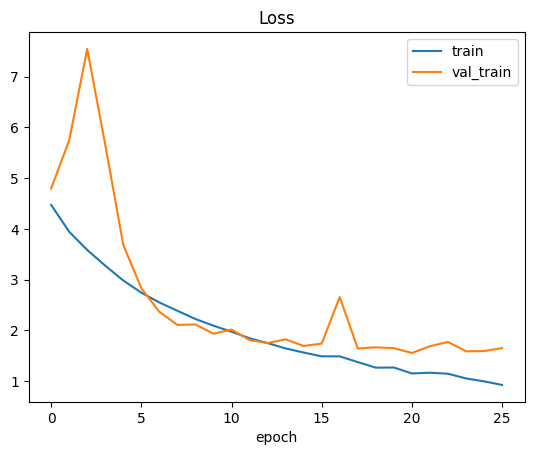

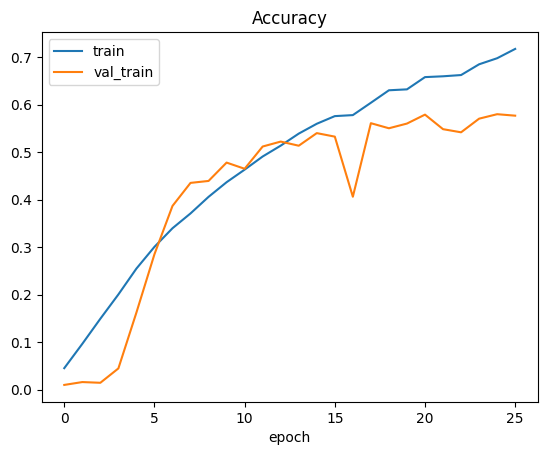

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Loss: 1.5555741786956787, test accuracy: 0.579


In [49]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

#Training
history = model.fit(x_train, y_train, epochs=60, batch_size=512, callbacks=[early_stopping],
verbose=1, validation_data=(x_test, y_test))

# Plotting loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Prediction
predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

# Final score
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")

# Project Summary & Conclusions (CIFAR-100)

In this advanced experiment, we tackled the **CIFAR-100** dataset, classifying images into **100 fine-grained categories**.

### Results Analysis:
* **Final Accuracy:** ~58% (Top-1). Given the complexity of the task (100 classes, low resolution), this is a solid baseline for a custom CNN trained from scratch.
* **Overfitting:** We observed a gap between Training Accuracy (72%) and Validation Accuracy (~58%). This is expected as CIFAR-100 has few samples per class (500 images), making it hard for the model to generalize without external data.

### Key Learnings:
1.  **Architecture Scaling:** We successfully scaled the VGG-style architecture (double convolutions, Batch Normalization) to handle a much harder task than MNIST/CIFAR-10.
2.  **Regularization:** Heavy Dropout (up to 0.5) and Batch Normalization were crucial. Without them, the model would likely overfit much earlier or fail to converge.
3.  **Challenges of Granularity:** Distinguishing between similar classes (e.g., *Otter* vs. *Beaver*) requires significantly more data or pre-trained weights (Transfer Learning).

### Next Steps for Improvement:
To push accuracy beyond 70-80%, standard industry practice would be to use **Transfer Learning** (e.g., ResNet50 pre-trained on ImageNet) and **Data Augmentation** (RandomCrop, HorizontalFlip).